In [8]:
import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from knn_classifier import calculate_metrics

def load_model(path):
    """
    Load data from csv file
    :param path: Path for the csv file
    :return: return the data in the file
    """
    data = pd.read_csv(path)
    return data


def preprocess_input(X):
    """
    Remove uncessary column and convert date to ordinal data
    :param X: input data to preprocess
    :return: processed data
    """
    X.drop(columns=['end'], inplace=True)
    X.drop(columns=['start'], inplace=True)

    X.drop(columns=['SHAPELEN'], inplace=True)
    X.drop(columns=['SHAPEAREA'], inplace=True)
    
    #X.drop(columns=['max_temperature'], inplace=True)
    X.drop(columns=['min_temperature'], inplace=True)
    X.drop(columns=['avg_temperature'], inplace=True)
    X.drop(columns=['departure_temperature'], inplace=True)
    #X.drop(columns=['hdd'], inplace=True)
    #X.drop(columns=['cdd'], inplace=True)
    #X.drop(columns=['percipitation'], inplace=True)
    print(X.columns)

        
#     X['start'] = pd.to_datetime(X['start'])
#     X['start'] = X['start'].map(datetime.datetime.toordinal)
    X = pd.get_dummies(X)
    return X


def make_confusion_matrix(cf, categories,
                          group_names=None,
                          count=True,
                          percent=True,
                          color_bar=True,
                          xy_ticks=True,
                          xy_plot_labels=True,
                          sum_stats=True,
                          fig_size=None,
                          c_map='Blues',
                          title=None):
    """
    Code to generate text within each box and beautify confusion matrix.
    :param cf: Confusion matrix
    :param categories: array of classes
    :param group_names: classes in the project
    :param count: whether to display the count of each class
    :param percent: whether to display percentage for each class
    :param color_bar: whether to display color bar for the heat map
    :param xy_ticks: whether to display xy labels
    :param xy_plot_labels: whether to display xy title
    :param sum_stats: whether to display overall accuracy
    :param fig_size: size of the plot
    :param c_map: color scheme to use
    :param title: Title of the plot
    :return: Confusion matrix
    """
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        row_size = np.size(cf, 0)
        col_size = np.size(cf, 1)
        group_percentages = []
        for i in range(row_size):
            for j in range(col_size):
                group_percentages.append(cf[i][j] / cf[i].sum())
        group_percentages = ["{0:.2%}".format(value)
                             for value in group_percentages]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip()
                  for v1, v2, v3 in zip(group_labels,
                                        group_counts,
                                        group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))
        stats_text = "\n\nAccuracy={0:0.2%}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if fig_size is None:
        # Get default figure size if not set
        fig_size = plt.rcParams.get('figure.figsize')

    if not xy_ticks:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEAT MAP VISUALIZATION
    plt.figure(figsize=fig_size)
    sns.heatmap(cf, annot=box_labels, fmt="",
                cmap=c_map, cbar=color_bar,
                xticklabels=categories,
                yticklabels=categories)

    if xy_plot_labels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)


def io_trend(variable, output, data):
    """
    Identify positive or negative relation with the output label
    :param variable: input variable
    :param output: label
    :param data: wildfire data set
    :return: plot graph showing the relation
    """
    plt.clf()
    sns.regplot(x=variable, y=output, data=data)
    plt.savefig('../model_visualization/logistic_regression/{}_relation.png'.format(variable))

Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_auc_score:  0.7619825708061003
f1 score:  0.7150837988826815
accuracy score:  0.7571428571428571
Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_auc_score:  0.7517529665587918
f1 score:  0.6705882352941177
accuracy score:  0.821656050955414
Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_auc_score:  0.7057698992005562
f1 score:  0.5748502994011976
accuracy score:  0.864244741873805
Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_auc

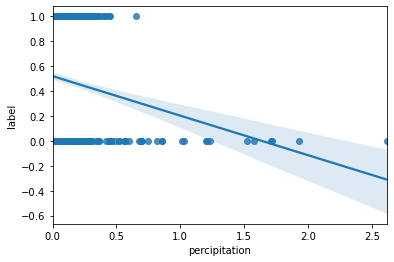

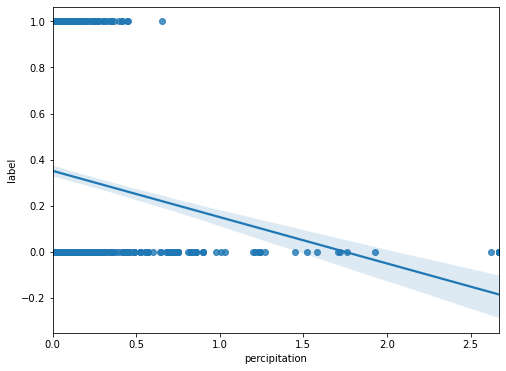

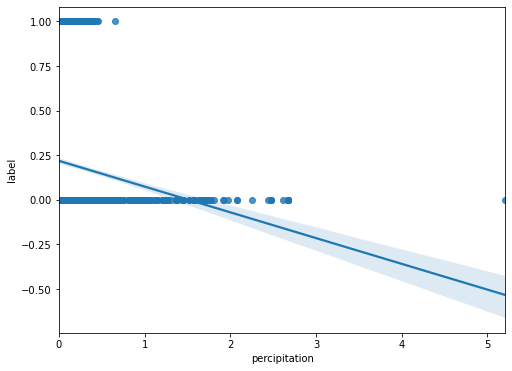

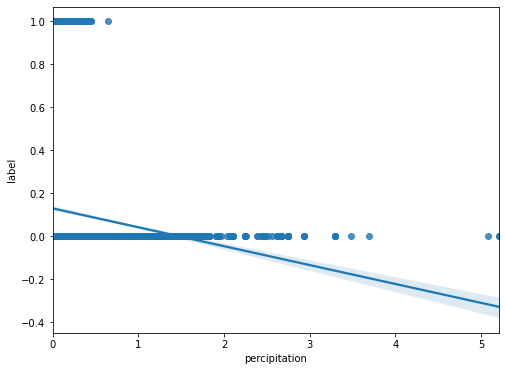

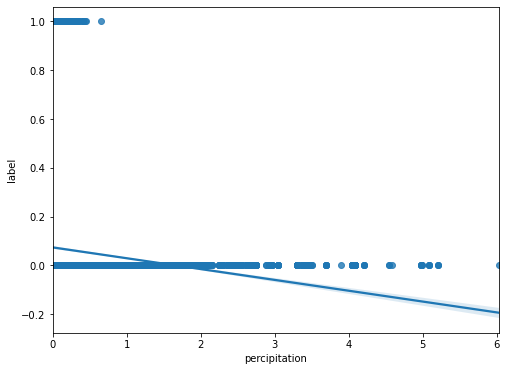

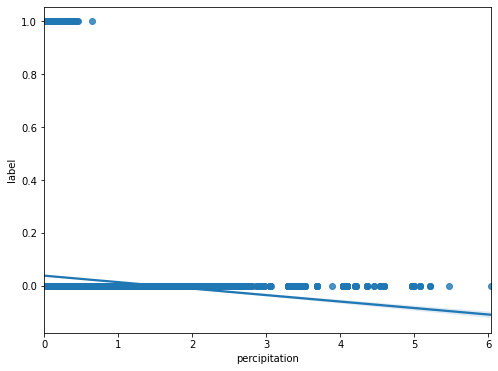

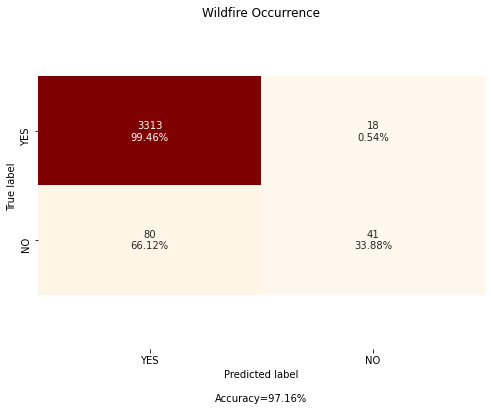

In [9]:
def svmLinearKernel():
    FileNameList = [1,2,4,8,16,32]
    metricList = []
    for fileName in FileNameList:
        #available fileName = 1,2,4,8,16,32,300
        DATA_FILE = '../data/preprocessed/'+str(fileName)+'.csv'
        print('Loading data...')
        data = load_model(DATA_FILE)
        # Plot relation between input and output variables
        print('Plot relations...')
        io_trend('max_temperature', 'label', data)
        io_trend('percipitation', 'label', data)
        # input data
        X = data.iloc[:, 6:-1]
        X = preprocess_input(X)
        # output data
        y = data.iloc[:, -1]
        # Split train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # Logistic regression classifier
        print('Classify data...')

        clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='linear')).fit(X_train, y_train)
        prediction = clf.predict(X_test)
        print('Plot confusion matrix...')
        corr = confusion_matrix(y_test, prediction)
        
        metrics = calculate_metrics(y_test,prediction)
        metricList.append(metrics)
        
        # plot confusion matrix
        make_confusion_matrix(corr,
                              categories=['YES', 'NO'],
                              count=True,
                              percent=True,
                              color_bar=False,
                              xy_ticks=True,
                              xy_plot_labels=True,
                              sum_stats=True,
                              fig_size=(8, 6),
                              c_map='OrRd',
                              title='Wildfire Occurrence')
        # error correction - cropped heat map
        b, t = plt.ylim()  # discover the values for bottom and top
        b += 0.5  # Add 0.5 to the bottom
        t -= 0.5  # Subtract 0.5 from the top
        plt.ylim(b, t)  # update the ylim(bottom, top) values
        plt.savefig('../model_visualization/svm/confusion_matrix_linear'+str(fileName)+'.png', bbox_inches='tight')
      
    print("=============================================================================================")
    print("All Metrics for different dataset and weight")
    print("=============================================================================================")
    i = 0
    for fileName in FileNameList:
        metrics = metricList[i]
        print("=============================================================")
        print(fileName)
        print("Accuracy Score : {}".format(metrics["accuracy_score"]))
        print("ROC AUC SCORE : {}".format(metrics["roc_auc_score"]))
        print("F1 Score : {}".format(metrics["f1_score"]))
        print("")
        i+=1


# if __name__ == '__main__':
#     main()
svmLinearKernel()

Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_auc_score:  0.5925925925925928
f1 score:  0.5656565656565656
accuracy score:  0.5904761904761905
Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_auc_score:  0.6615426105717369
f1 score:  0.5303867403314917
accuracy score:  0.7292993630573248
Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_auc_score:  0.6522093326381648
f1 score:  0.4615384615384615
accuracy score:  0.8260038240917782
Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_a

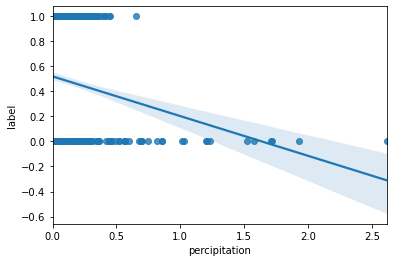

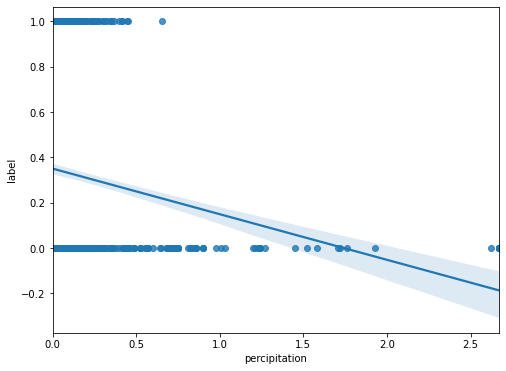

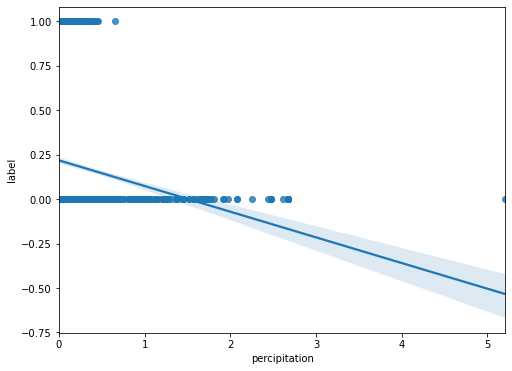

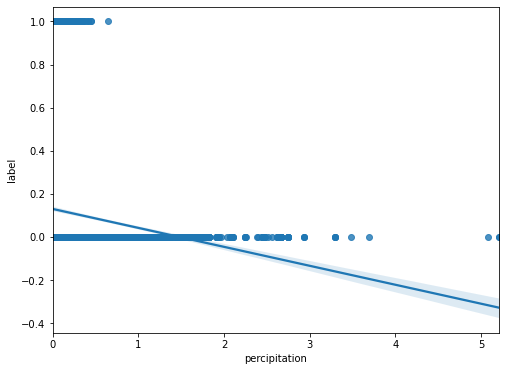

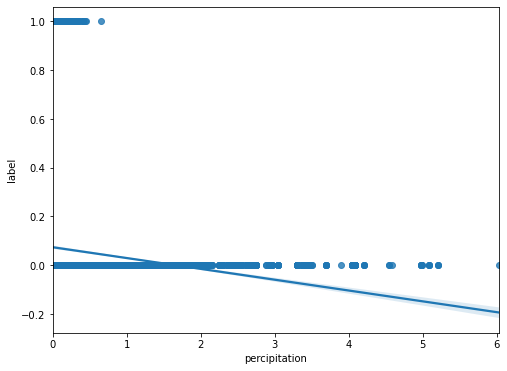

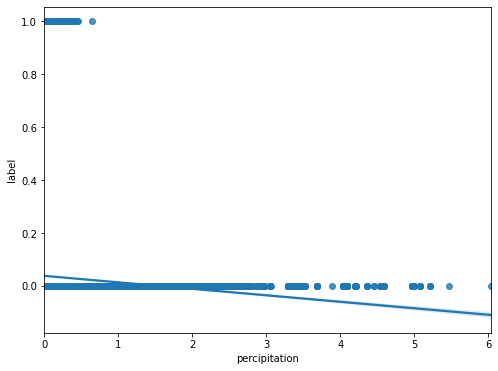

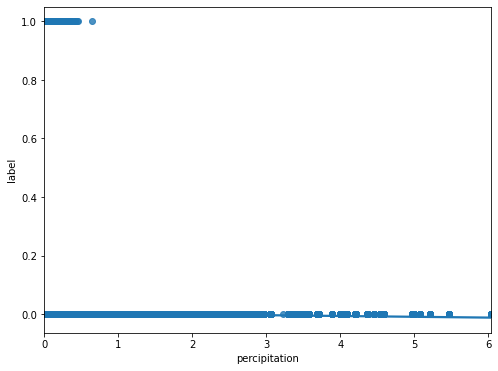

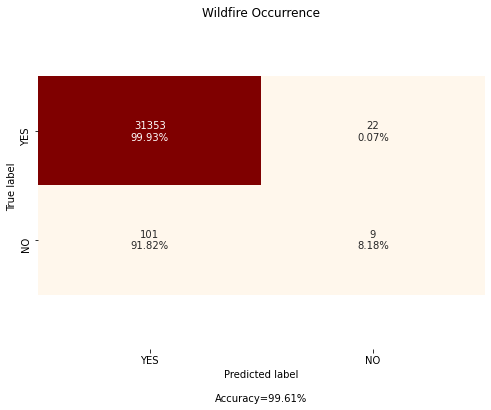

In [10]:
def svmSigMoidKernel():
    FileNameList = [1,2,4,8,16,32,300]
    metricList = []
    for fileName in FileNameList:
        #available fileName = 1,2,4,8,16,32,300
        DATA_FILE = '../data/preprocessed/'+str(fileName)+'.csv'
        print('Loading data...')
        data = load_model(DATA_FILE)
        # Plot relation between input and output variables
        print('Plot relations...')
        io_trend('max_temperature', 'label', data)
        io_trend('percipitation', 'label', data)
        # input data
        X = data.iloc[:, 6:-1]
        X = preprocess_input(X)
        # output data
        y = data.iloc[:, -1]
        # Split train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # Logistic regression classifier
        print('Classify data...')

        clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='sigmoid')).fit(X_train, y_train)
        prediction = clf.predict(X_test)
        print('Plot confusion matrix...')
        corr = confusion_matrix(y_test, prediction)
        
        #compute metrics
        metrics = calculate_metrics(y_test,prediction)
        metricList.append(metrics)
        
        # plot confusion matrix
        make_confusion_matrix(corr,
                              categories=['YES', 'NO'],
                              count=True,
                              percent=True,
                              color_bar=False,
                              xy_ticks=True,
                              xy_plot_labels=True,
                              sum_stats=True,
                              fig_size=(8, 6),
                              c_map='OrRd',
                              title='Wildfire Occurrence')
        # error correction - cropped heat map
        b, t = plt.ylim()  # discover the values for bottom and top
        b += 0.5  # Add 0.5 to the bottom
        t -= 0.5  # Subtract 0.5 from the top
        plt.ylim(b, t)  # update the ylim(bottom, top) values
        plt.savefig('../model_visualization/svm/confusion_matrix_sigmoid'+str(fileName)+'.png', bbox_inches='tight')

    print("=============================================================================================")
    print("All Metrics for different dataset and weight")
    print("=============================================================================================")
    i = 0
    for fileName in FileNameList:
        metrics = metricList[i]
        print("=============================================================")
        print(fileName)
        print("Accuracy Score : {}".format(metrics["accuracy_score"]))
        print("ROC AUC SCORE : {}".format(metrics["roc_auc_score"]))
        print("F1 Score : {}".format(metrics["f1_score"]))
        print("")
        i+=1
svmSigMoidKernel()

Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_auc_score:  0.5925925925925928
f1 score:  0.5656565656565656
accuracy score:  0.5904761904761905
Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_auc_score:  0.6615426105717369
f1 score:  0.5303867403314917
accuracy score:  0.7292993630573248
Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_auc_score:  0.6522093326381648
f1 score:  0.4615384615384615
accuracy score:  0.8260038240917782
Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_a

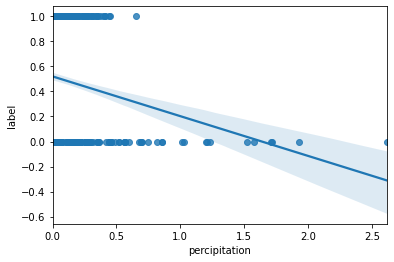

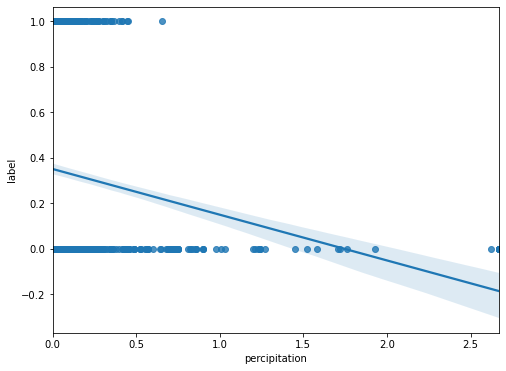

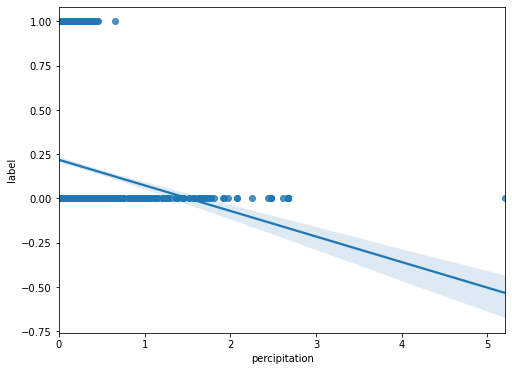

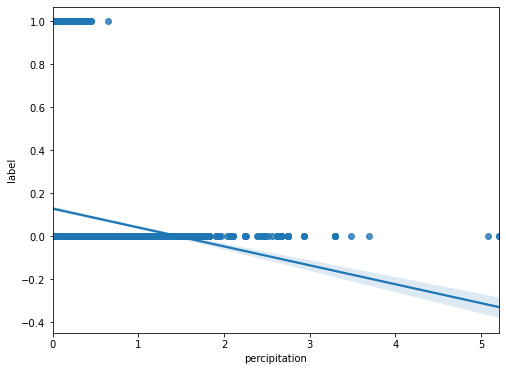

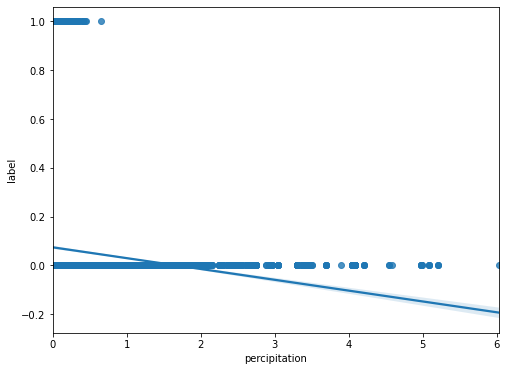

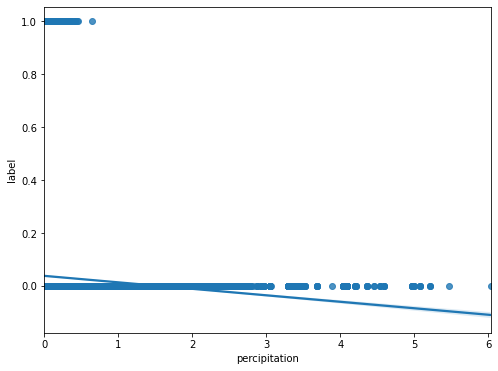

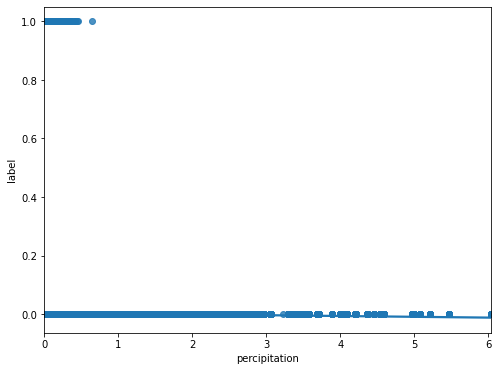

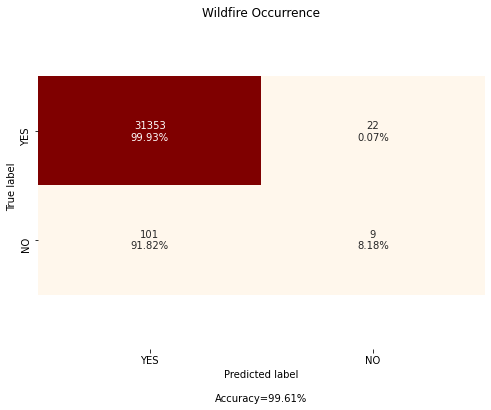

In [11]:
def svmSigPolyKernel():
    FileNameList = [1,2,4,8,16,32]
    metricList = []
    for fileName in FileNameList:
        #available fileName = 1,2,4,8,16,32,300
        DATA_FILE = '../data/preprocessed/'+str(fileName)+'.csv'
        print('Loading data...')
        data = load_model(DATA_FILE)
        # Plot relation between input and output variables
        print('Plot relations...')
        io_trend('max_temperature', 'label', data)
        io_trend('percipitation', 'label', data)
        # input data
        X = data.iloc[:, 6:-1]
        X = preprocess_input(X)
        # output data
        y = data.iloc[:, -1]
        # Split train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # Logistic regression classifier
        print('Classify data...')

        clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='poly')).fit(X_train, y_train)
        prediction = clf.predict(X_test)
        print('Plot confusion matrix...')
        corr = confusion_matrix(y_test, prediction)
        
        #compute metrics
        metrics = calculate_metrics(y_test,prediction)
        metricList.append(metrics)
        
        # plot confusion matrix
        make_confusion_matrix(corr,
                              categories=['YES', 'NO'],
                              count=True,
                              percent=True,
                              color_bar=False,
                              xy_ticks=True,
                              xy_plot_labels=True,
                              sum_stats=True,
                              fig_size=(8, 6),
                              c_map='OrRd',
                              title='Wildfire Occurrence')
        # error correction - cropped heat map
        b, t = plt.ylim()  # discover the values for bottom and top
        b += 0.5  # Add 0.5 to the bottom
        t -= 0.5  # Subtract 0.5 from the top
        plt.ylim(b, t)  # update the ylim(bottom, top) values
        plt.savefig('../model_visualization/svm/confusion_matrix_poly'+str(fileName)+'.png', bbox_inches='tight')

    print("=============================================================================================")
    print("All Metrics for different dataset and weight")
    print("=============================================================================================")
    i = 0
    for fileName in FileNameList:
        metrics = metricList[i]
        print("=============================================================")
        print(fileName)
        print("Accuracy Score : {}".format(metrics["accuracy_score"]))
        print("ROC AUC SCORE : {}".format(metrics["roc_auc_score"]))
        print("F1 Score : {}".format(metrics["f1_score"]))
        print("")
        i+=1
svmSigMoidKernel()

Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_auc_score:  0.5925925925925928
f1 score:  0.5656565656565656
accuracy score:  0.5904761904761905
Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_auc_score:  0.6615426105717369
f1 score:  0.5303867403314917
accuracy score:  0.7292993630573248
Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_auc_score:  0.6522093326381648
f1 score:  0.4615384615384615
accuracy score:  0.8260038240917782
Loading data...
Plot relations...
Index(['max_temperature', 'hdd', 'cdd', 'percipitation'], dtype='object')
Classify data...
Plot confusion matrix...
Calculating metrics...
roc_a

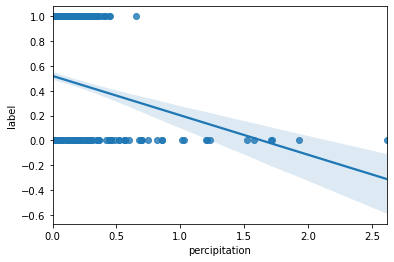

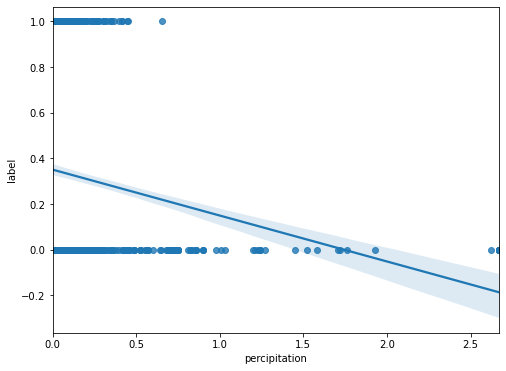

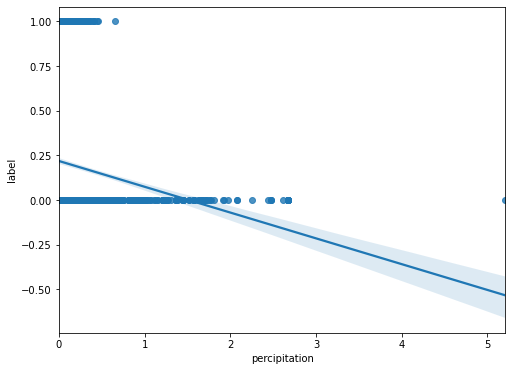

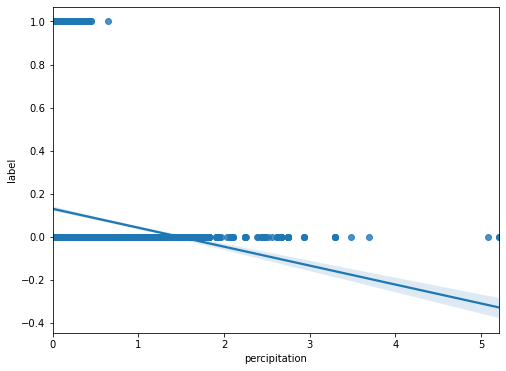

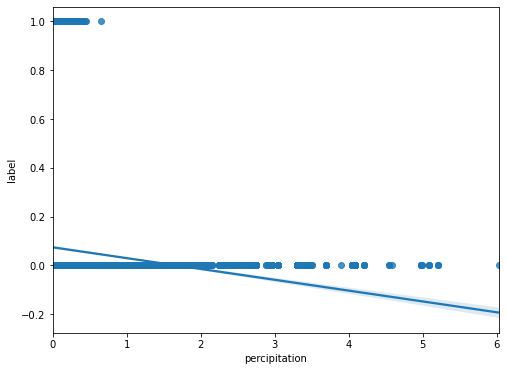

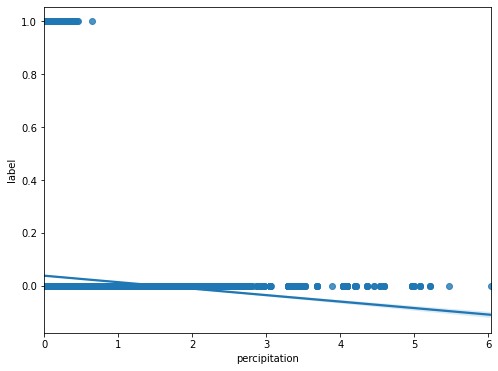

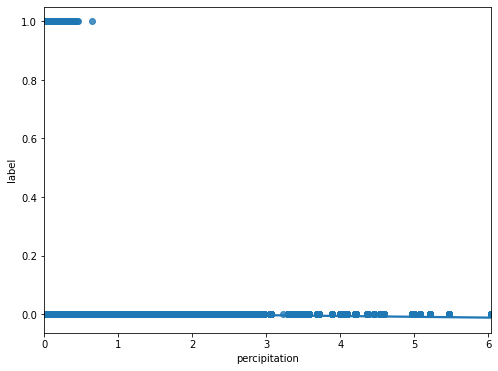

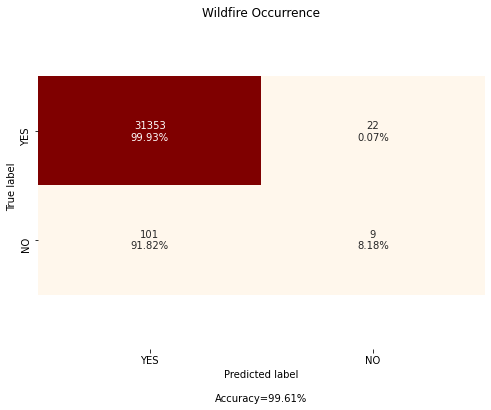

In [12]:
def svmrbfKernel():
    FileNameList = [1,2,4,8,16,32, 300]
    metricList = []
    for fileName in FileNameList:
        #available fileName = 1,2,4,8,16,32,300
        DATA_FILE = '../data/preprocessed/'+str(fileName)+'.csv'
        print('Loading data...')
        data = load_model(DATA_FILE)
        # Plot relation between input and output variables
        print('Plot relations...')
        io_trend('max_temperature', 'label', data)
        io_trend('percipitation', 'label', data)
        # input data
        X = data.iloc[:, 6:-1]
        X = preprocess_input(X)
        # output data
        y = data.iloc[:, -1]
        # Split train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # Logistic regression classifier
        print('Classify data...')

        clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)
        prediction = clf.predict(X_test)
        print('Plot confusion matrix...')
        corr = confusion_matrix(y_test, prediction)
        
        #compute metrics
        metrics = calculate_metrics(y_test,prediction)
        metricList.append(metrics)
        
        # plot confusion matrix
        make_confusion_matrix(corr,
                              categories=['YES', 'NO'],
                              count=True,
                              percent=True,
                              color_bar=False,
                              xy_ticks=True,
                              xy_plot_labels=True,
                              sum_stats=True,
                              fig_size=(8, 6),
                              c_map='OrRd',
                              title='Wildfire Occurrence')
        # error correction - cropped heat map
        b, t = plt.ylim()  # discover the values for bottom and top
        b += 0.5  # Add 0.5 to the bottom
        t -= 0.5  # Subtract 0.5 from the top
        plt.ylim(b, t)  # update the ylim(bottom, top) values
        plt.savefig('../model_visualization/svm/confusion_matrix_rbf'+str(fileName)+'.png', bbox_inches='tight')

    print("=============================================================================================")
    print("All Metrics for different dataset and weight")
    print("=============================================================================================")
    i = 0
    for fileName in FileNameList:
        metrics = metricList[i]
        print("=============================================================")
        print(fileName)
        print("Accuracy Score : {}".format(metrics["accuracy_score"]))
        print("ROC AUC SCORE : {}".format(metrics["roc_auc_score"]))
        print("F1 Score : {}".format(metrics["f1_score"]))
        print("")
        i+=1
svmSigMoidKernel()